In [78]:
# Required imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [99]:
# Read in data as .csv file

file_loc = os.getcwd() + "/ppo_training_logs/training_log_SpaceInvaders.csv"
print(file_loc)
log_file = pd.read_csv(filepath_or_buffer= file_loc, header= None, index_col= None, names= ["Epoch", "Score", "Duration"])

/Users/patrickowens/Documents/ai_local/group_project/ai/ppo/ppo_training_logs/training_log_SpaceInvaders.csv
         Epoch  Score  Duration
0           97     50  1.220311
1          290     90  2.390122
2          460    110  2.013024
3          610    125  1.996266
4          752     50  1.831350
...        ...    ...       ...
24921  1160186    285  2.924485
24922  1160525    510  4.081235
24923  1160811    555  3.856481
24924  1161106    520  3.650200
24925  1161380    285  4.368327

[24926 rows x 3 columns]


In [102]:
# Have the epoch numver continually incrementing, remove the resets

addition = 0
diff = 0
for i in range(len(log_file) - 1):
    if((log_file.iloc[(i + 1),0] - log_file.iloc[i,0]) < 0):
        diff = log_file.iloc[i,0]

    log_file.iloc[i,0] += addition
    addition += diff
    diff = 0
log_file.iloc[(len(log_file) - 1),0] += addition

In [103]:
log_file

,Epoch,Score,Duration
0,97,50,1.220311
1,290,90,2.390122
2,460,110,2.013024
3,610,125,1.996266
4,752,50,1.831350
...,...,...,...
24921,5646163,285,2.924485
24922,5646502,510,4.081235
24923,5646788,555,3.856481
24924,5647083,520,3.650200


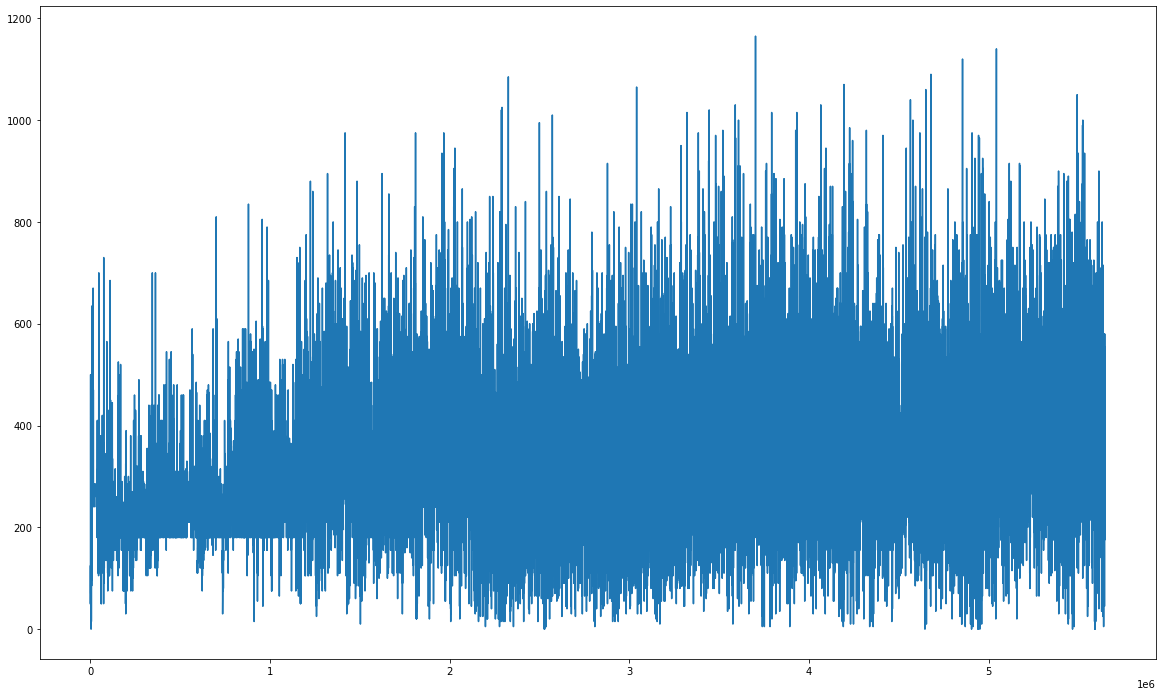

In [104]:
# Display on the plot as epoch versus score

np_data = log_file.to_numpy()
#print(np_data[:,0])
plt.figure(figsize = (20,12))
plt.plot(np_data[:,0], np_data[:,1])
plt.show()

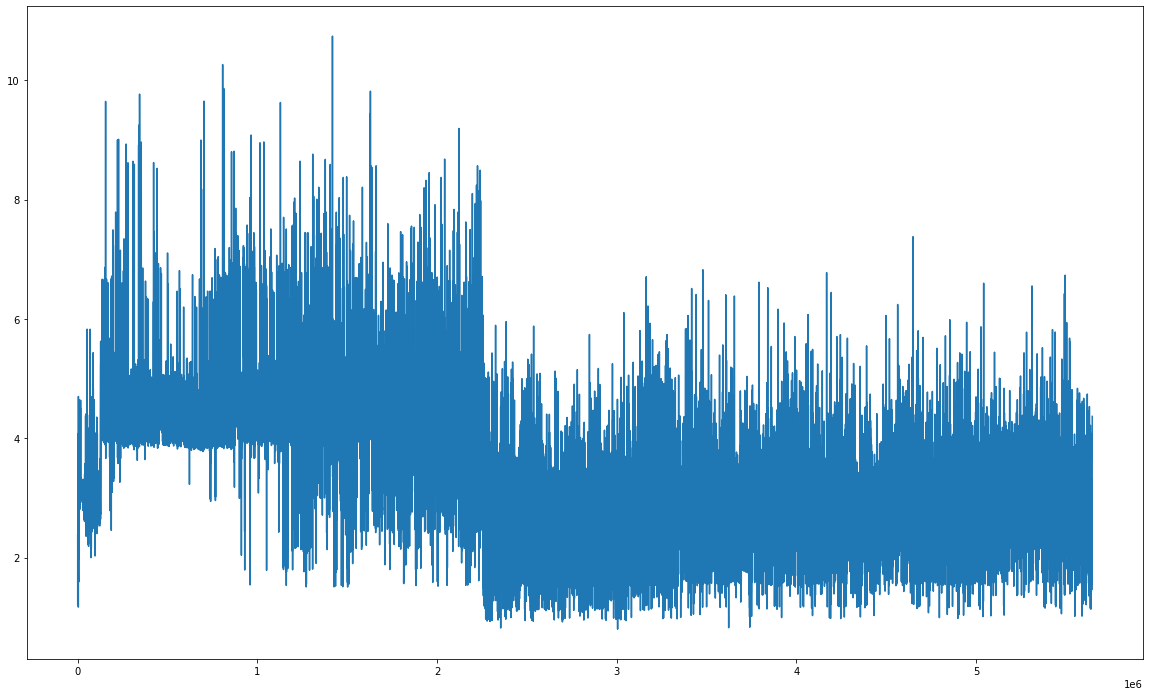

In [105]:
# Display on the plot as epoch versus game duration

np_data = log_file.to_numpy()
#print(np_data[:,0])
plt.figure(figsize = (20,12))
plt.plot(np_data[:,0], np_data[:,2])
plt.show()